## Neural Networks

Neural networks are one of the earliest examples of a machine learning model. Neural networks were initially introduced in the 1940s and have risen and fallen several times from popularity. The current generation of deep learning begain in 2006 with an improved training algorithm by Geoffrey Hinton.

![Perceptron](resources/images/M_1/and_or.png)

In 1969, in their book [Perceptrons](https://mitpress.mit.edu/books/perceptrons) Marvin Minksy and Seymour Papert demonstrate the limitations of perceptrons to solve only **_"linearly separable"_** problems.

#### XOR
![Perceptron](resources/images/M_1/xor.png)


Can we draw a single line through here to devide the T & F?? We can not. The point is this is not leniarly seperable data. We could draw two lines the T's are inside the two lines and the F's resides outside.

What is XOR actually? XOR is actually or but not AND.

lets say, we have a perceptron that can perform !AND operation. What if, we take the same inputs and send them to another perceptron which can solve OR. Taking both the outputs and by sending them to aother perceptron that can solve AND, we can produce the XOR output.

So the idea is, more complex problems that are not linearly seperable can be solved by linking multiple perceptrons.
they are also known as multi layer perceptron or neural networks.

The figure shows a three layer neural network. The layers are input, hidden and output. The input layers take the input (in case of XOR the inputs can be (0,0), (0,1), (1,0) or (1,1)) and the output layer produces output (1 or 0). The hidden layer contains the neurons that sit between input and output layer. They are reffered to as hidden because as a user of the system you don't necessarely see them. Inside this hidden layer where the magic happens ! Hidden layer allows us to get around this linearly seperable question. The more hidden layers, the more neurons - gives us more parameters to play with more complex problems.

![Perceptron](resources/images/M_1/nn2layer.png)


Each input neuron ($x_1$ and $x_2$) is connected to each neuron ($h_1$ and $h_2$) of the hidden layer. Each hidden neuron ($h_1$ and $h_2$) is connected to each output neuron ($O$). All these connections has a weight ($W_{ij}$). 

We can compute the values for each neuron:

$$
\begin{split}
h_1 & = W_{11} * x_1 + W_{12} * x_2 + b_1\\
h_2 & = W_{21} * x_1 + W_{22} * x_2 + b_2\\
O & = W_{01} * h_1 + W_{02} * h_2 + b_0\\
\end{split}
$$

What feels normal is that, there is all these connections. We can write some for loop and compute the values for each node/neuron. Remember that inside the neuron weighted sum is calculated with each connection and it's corrosponding input value. Then the result is passed through some activation function - which is the output of that neuron.

#### The power of representation

Inputs come in, you can calculate the weighted sum of all the neurons for the next layer. That can be done in a single operation if the inputs and the weights are represented as matrix form in our code. 

$$
\begin{split}
\begin{bmatrix} W_{11} & W_{12} \\ W_{21} & W_{22} \end{bmatrix}
\begin{bmatrix} x_1 \\ x_2  \end{bmatrix}
& =
\begin{bmatrix}  W_{11} * x_1 + W_{12} * x_2 \\  W_{21} * x_1 + W_{22} * x_2 \end{bmatrix} \\
& \Rightarrow
\begin{bmatrix}  W_{11} * x_1 + W_{12} * x_2 \\  W_{21} * x_1 + W_{22} * x_2 \end{bmatrix} 
+ \begin{bmatrix} b_1 \\ b_2  \end{bmatrix}\\
 & =
\begin{bmatrix} h_1 \\ h_2  \end{bmatrix}
\end{split}
$$


### Feed Forward Network

The inputs come in, you take the weighted sum, add the bias, and finally pass it through the activation function. That results feed forward through the network and gets to the out put.

So we can write the generalized form for calculating the weight matrix of hidden and output.
$$ H = \sigma( W^{HI}_{ij}I + b^{H}) $$
$$ O = \sigma( W^{OH}_{ij}H + b^{O}) $$




### Backpropagation

![Perceptron](resources/images/M_1/err_update1.png)

$$ E_{h_1} = \dfrac{W_1}{W_1 + W_2} \times E_O $$

$$ E_{h_2} = \dfrac{W_2}{W_1 + W_2} \times E_O $$

![Perceptron](resources/images/M_1/err_update2.png)

$$ E_{h_1} = \dfrac{W_{11}}{W_{11} + W_{12}} \times E_{O_1} + \dfrac{W_{21}}{W_{21} + W_{22}} \times E_{O_2} $$

$$ E_{h_2} = \dfrac{W_{12}}{W_{11} + W_{12}} \times E_{O_1} + \dfrac{W_{22}}{W_{21} + W_{22}} \times E_{O_2} $$


Remember from perceptron :

$$ Y = mX+b $$

$$ \Delta m = \alpha \times E \times X $$

$$ \Delta b = \alpha \times E $$

Now, we have:

![Perceptron](resources/images/M_1/err_update3.png)

$$ Y = \sigma(WX + b) $$

$$ \Delta W^{OH}_{ij} = \alpha \times E_O \times (O \times (1-O)) \bullet H^T $$

$$ \Delta W^{HI}_{ij} = \alpha \times E_H \times (H \times (1-H)) \bullet I^T $$



In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

X = np.array([ [0,0], [0,1], [1,0], [1,1] ])
Y = np.array([ [0], [1], [1], [0] ])

In [2]:
class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayerNeurons = 10
        outLayerNeurons = 1
        
        self.learning_rate = 0.2
        self.W_HI = np.random.randn(inputLayerNeurons, hiddenLayerNeurons)
        self.W_OH = np.random.randn(hiddenLayerNeurons, outLayerNeurons)
        
    def sigmoid(self, x, der=False):
        if der == True:
            return x * (1-x)
        else:
            return 1 / (1 + np.exp(-x))
        
    def feedForward(self, X):
        hidden_input = np.dot(X, self.W_HI)
        self.hidden_output = self.sigmoid(hidden_input)
        
        output_input = np.dot(self.hidden_output, self.W_OH)
        pred = self.sigmoid(output_input)
        return pred
        
    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)
        
        hidden_error = output_delta.dot(self.W_OH.T)
        hidden_delta = self.learning_rate * hidden_error * self.sigmoid(self.hidden_output, der=True)
        
        self.W_HI += X.T.dot(hidden_delta)
        self.W_OH += self.hidden_output.T.dot(output_delta)
        
    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X,Y,output)

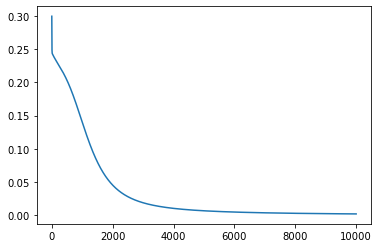

In [3]:
NN = NeuralNetwork()

err = []
for i in range(10000):
    NN.train(X,Y)
    err.append(np.mean(np.square(Y - NN.feedForward(X))))

plt.plot(err)

In [4]:
print(NN.feedForward([0,0]))

[0.05285688]


In [5]:
print(NN.feedForward([1,1]))

[0.04283578]


In [6]:
print(NN.feedForward([1,0]))

[0.95335457]


In [7]:
print(NN.feedForward([0,1]))

[0.95587195]
